**#0 Importy**

In [45]:
# Importy związane z danymi i modelowaniem
import numpy as np
from sklearn.model_selection import train_test_split

# Importy związane z TensorFlow i Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Importy związane z wizualizacją
import matplotlib.pyplot as plt

**I CZĘŚĆ**

**#1 Wczytanie danych**

In [46]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli 
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

**#2 Podział danych**

In [47]:
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

**#3 Tworzenie modelu**

In [48]:
f_mnist_model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Spłaszczenie wejścia
    layers.Dense(512, activation='relu'),  # Więcej neuronów
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Warstwa wyjściowa
])

C:\Users\Mateusz\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**#4 Kompilacja modelu**

In [49]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.005),
    metrics=['accuracy']
)

**#5 Podgląd modelu**

In [50]:
f_mnist_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

**#6 Szkolenie modelu**

In [51]:
train_stats = f_mnist_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7453 - loss: 0.7242 - val_accuracy: 0.8303 - val_loss: 0.4462
Epoch 2/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8385 - loss: 0.4389 - val_accuracy: 0.8635 - val_loss: 0.3852
Epoch 3/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8516 - loss: 0.4038 - val_accuracy: 0.8683 - val_loss: 0.3672
Epoch 4/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8618 - loss: 0.3738 - val_accuracy: 0.8768 - val_loss: 0.3733
Epoch 5/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8711 - loss: 0.3622 - val_accuracy: 0.8655 - val_loss: 0.3836
Epoch 6/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8720 - loss: 0.3493 - val_accuracy: 0.8762 - val_loss: 0.3986
Epoch 7/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8747 - loss: 0.3465 - val_accuracy: 0.8728 - val_loss: 0.3817
Epoch 8/30
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8741 - loss: 0

**#7 Ocena modelu**

In [52]:
test_loss, test_acc = f_mnist_model.evaluate(X_test, y_test)
print(f"Dokładność na zbiorze testowym: {test_acc:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.4164
Dokładność na zbiorze testowym: 0.87


Model osiągnął dokładność 88% na zbiorze testowym przy większej liczbie neuronów (512 vs 300) oraz współczynniku uczenia równym 0.005.

**II CZĘŚĆ**

**#8 Zapisanie i załadowanie nowego modelu**

In [53]:
f_mnist_model.save('fashion_mnist_model.keras')

In [54]:
new_model = tf.keras.models.load_model('fashion_mnist_model.keras')

**#9 Wizualizacja klas**

In [55]:
def predict_image(image, model, true_label=None):
    image = np.expand_dims(image, axis=-1)  
    image = np.expand_dims(image, axis=0)  
    
    prediction = model.predict(image)  
    predicted_label = np.argmax(prediction, axis=1)[0]  
    
    # Wyświetlenie obrazu z przypisaną etykietą
    plt.imshow(image[0].squeeze())  
    if true_label is not None:
        plt.title(f"Predicted: {predicted_label} - True: {true_label}")
    else:
        plt.title(f"Predicted: {predicted_label}")
    plt.show()

    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


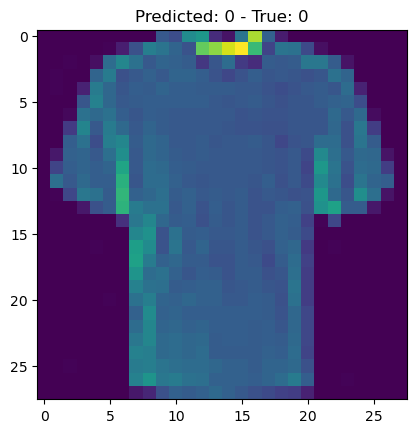

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


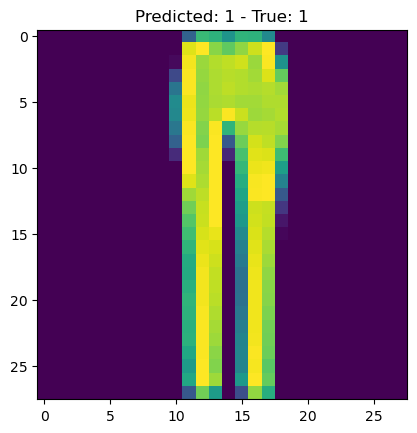

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


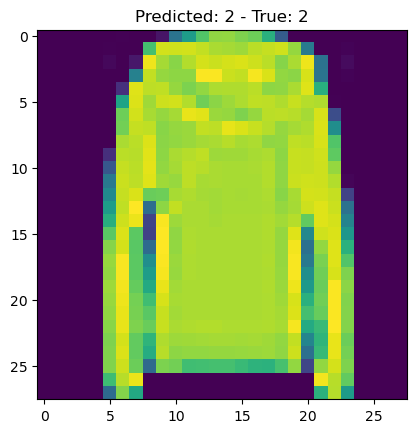

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


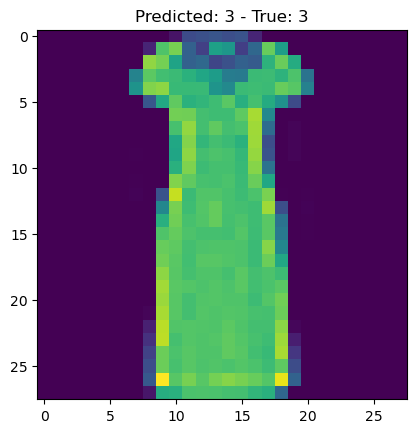

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


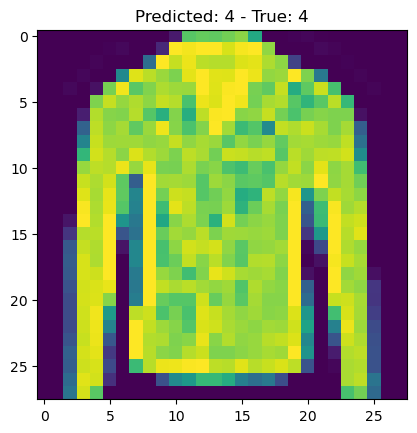

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


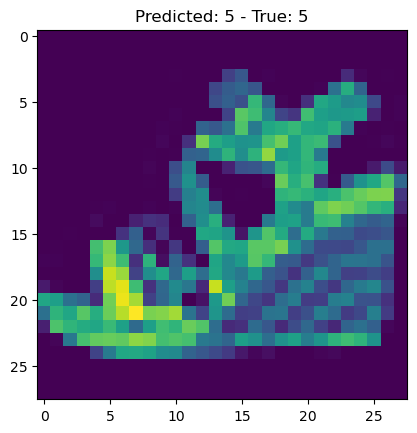

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


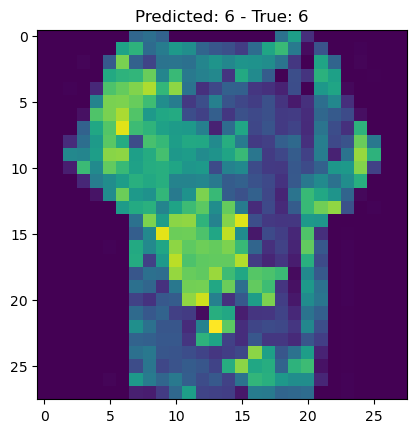

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


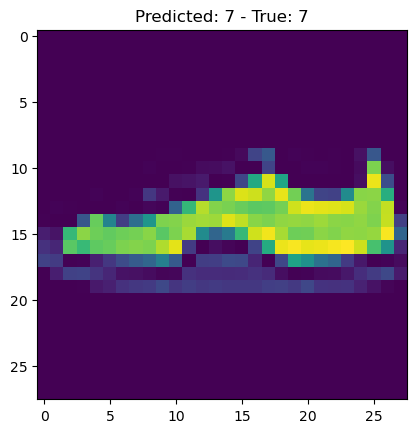

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


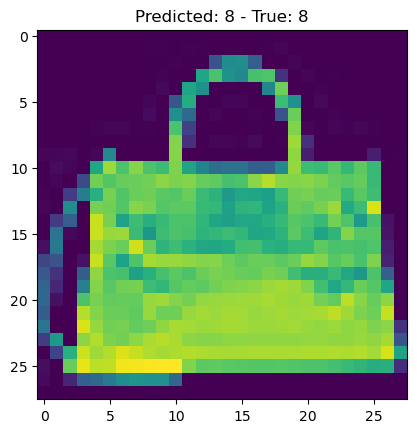

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


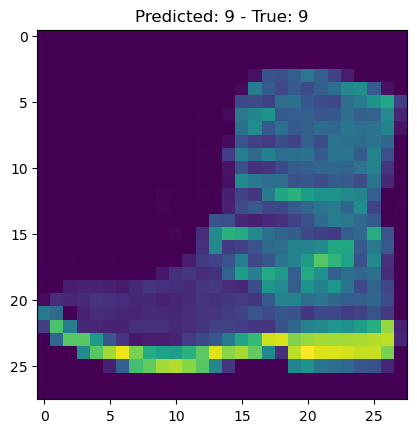

In [56]:
# Iteracja przez 10 klas
for i in range(10):
    image = X_test[y_test == i][0]  
    true_label = y_test[y_test == i][0]  # Prawdziwa etykieta
    predict_image(image, new_model, true_label)  # Predykcja z wyświetleniem obrazu

**III CZĘŚĆ**

**# Dodanie scheduler'a**

In [57]:
def const_scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Dodanie scheduler do treningu
lr_callback = LearningRateScheduler(const_scheduler)

**#10 Tworzenie generatora augmentacji**

In [58]:
# Rozbudowa danych do 4 wymiarów
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

datagen = ImageDataGenerator(
    width_shift_range=0.1,  # Przesunięcie obrazu w poziomie o 10% 
    height_shift_range=0.1, # Przesunięcie obrazu w pionie o 10% 
    shear_range=0.1,        # Shear (ścięcie) obrazu o 10% 
    zoom_range=0.1,         # Zoomowanie obrazu o 10% 
    horizontal_flip=True,   # Losowe odbicie obrazu w poziomie
    vertical_flip=False,    # Brak losowego odbicia obrazu w pionie
    fill_mode='constant'    # Sposób wypełniania nowych pikseli po transformacjach 
)


**#11 Wybór danych do augmentacji**

In [66]:
# Podział danych na treningowe i walidacyjne
X_train_no_aug, X_val, y_train_no_aug, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# Podział na część augmentowaną i nieaugmentowaną
X_train_no_aug, X_train_aug, y_train_no_aug, y_train_aug = train_test_split(X_train_no_aug, y_train_no_aug, test_size=0.5, random_state=10)

# Generator dla danych augmentowanych
train_datagen = datagen.flow(X_train_aug, y_train_aug, batch_size=32)

# Dataset dla danych nieaugmentowanych (jako nieskończona pętla)
train_no_aug = tf.data.Dataset.from_tensor_slices((X_train_no_aug, y_train_no_aug)).batch(32)
train_no_aug = train_no_aug.repeat()  # Powtarzanie, by nigdy się nie skończyło

# Połączenie augmentacji i surowych danych (50% augmentowanych, 50% oryginalnych)
def mixed_generator_balanced(no_aug_dataset, aug_generator):
    no_aug_iter = iter(no_aug_dataset)
    while True:
        yield next(no_aug_iter)  # Najpierw oryginalne
        yield next(aug_generator)  # Potem augmentowane

# Tworzenie generatora mieszanych danych (50% danych augmentowanych : 50% danych oryginalnych)
train_mixed_gen = mixed_generator_balanced(train_no_aug, train_datagen)

# Określenie liczby batchy na epokę
steps_per_epoch = len(X_train) // 32 

**#12 Szkolenie modelu przy użyciu mieszanych danych**

In [67]:
train_stats = new_model.fit(
    train_mixed_gen,
    epochs=30,
    steps_per_epoch=steps_per_epoch,  
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[lr_callback]
)

Epoch 1/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8482 - loss: 0.4108 - val_accuracy: 0.9027 - val_loss: 0.2783 - learning_rate: 0.0010
Epoch 2/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8489 - loss: 0.4059 - val_accuracy: 0.9068 - val_loss: 0.2766 - learning_rate: 0.0010
Epoch 3/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8496 - loss: 0.4111 - val_accuracy: 0.9034 - val_loss: 0.2857 - learning_rate: 0.0010
Epoch 4/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8475 - loss: 0.4054 - val_accuracy: 0.9059 - val_loss: 0.2712 - learning_rate: 0.0010
Epoch 5/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8534 - loss: 0.3950 - val_accuracy: 0.9036 - val_loss: 0.2789 - learning_rate: 0.0010
Epoch 6/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8570 - loss: 0.3933 - val_accuracy: 0.9050 - val_loss: 0.2781 - learning_rate: 0.0010
Epoch 7/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accura

**#13 Ocena modelu z augmentacją danych**

In [68]:
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Dokładność na zbiorze testowym po augmentacji: {test_acc:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8856 - loss: 0.3227
Dokładność na zbiorze testowym po augmentacji: 0.89


**#14 Podsumowanie**

Model bez augmentacji osiągnął 88% dokładności, natomiast model z augmentacją uzyskał 89%. Choć różnica w wynikach jest minimalna, augmentacja przyczyniła się do zwiększenia różnorodności danych, co może mieć pozytywny wpływ na zdolność modelu do generalizowania. Przy większej liczbie epok model z augmentacją mógłby osiągnąć jeszcze lepsze wyniki.